In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

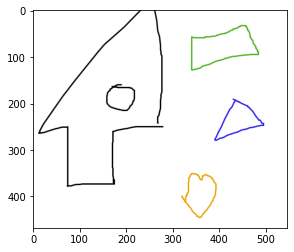

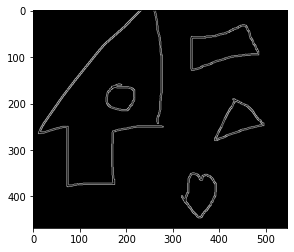

In [2]:
# Import de l'image et binarisation 

image = cv2.imread('Test.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
(thresh, image_binary) = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

plt.figure()
plt.imshow(image)
plt.show()

edges = cv2.Canny(image=image, threshold1=100, threshold2=200)

plt.figure()
plt.imshow(edges, cmap=plt.cm.gray)
plt.show()

In [3]:
print(type(edges))

<class 'numpy.ndarray'>


In [9]:
print(edges)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [10]:
print("longeur de y :", len(edges))
print("longeur de x :", len(edges[400]))

longeur de y : 468
longeur de x : 547


In [11]:
for y in range(len(edges)) :
    for x in range(len(edges[y])) :
        if edges[y][x] != 0 :
            print(edges[y][x])

255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255


In [12]:
edges[100][200]
edges[100][201]

0

In [ ]:
# Idée : transformer la matrice en des zéros et des 1
# Avec les cases noires étant 1 et les cases blanches étant des 0

In [ ]:
# But : obtenir les coordonées de tous les pixels qui doivent êtres colorés

In [13]:
def flood_liste(image, x : int, y : int, liste : list) -> list :
    """
    Fonction qui permet, à partir d'un image déjà binarisée, d'obtenir une liste contenant les coordonées de tous les pixels à colorier pour
    remplir la forme géométrique
    """ 

    image[y][x] = 255
    liste.append([x,y])

    if y-1>= 0 :
        if image[y-1][x] == 0 :
            flood_liste(image, x, y-1, liste)

    if y+1<=len(image) :
        if image[y+1][x] == 0 :
            flood_liste(image, x, y+1, liste)
    if x-1>=0 :
        if image[y][x-1] == 0 :
            flood_liste(image, x-1, y, liste)
    if x+1<=len(image[0]) :
        if image[y][x+1] == 0 :
            flood_liste(image, x+1, y, liste)
    
    return liste


In [ ]:
liste = []
l = flood_liste(edges, 100, 200, liste)
print(l)

: 

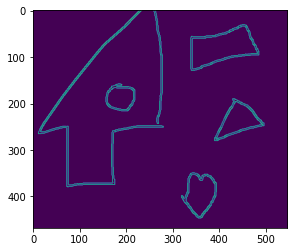

[(200, 100), (200, 99), (200, 98), (200, 97), (200, 96), (200, 95), (200, 94), (200, 93), (200, 92), (200, 91), (200, 90), (200, 89), (200, 88), (200, 87), (200, 86), (200, 85), (200, 84), (200, 83), (200, 82), (200, 81), (200, 80), (200, 79), (200, 78), (200, 77), (200, 76), (200, 75), (200, 74), (200, 73), (200, 72), (200, 71), (200, 70), (200, 69), (200, 68), (200, 67), (200, 66), (200, 65), (200, 64), (200, 63), (200, 62), (200, 61), (200, 60), (200, 59), (200, 58), (200, 57), (200, 56), (200, 55), (200, 54), (200, 53), (200, 52), (200, 51), (200, 50), (200, 49), (200, 48), (200, 47), (200, 46), (200, 45), (200, 44), (200, 43), (200, 42), (200, 41), (200, 40), (200, 39), (200, 38), (200, 37), (200, 36), (200, 35), (201, 35), (201, 34), (202, 34), (202, 33), (203, 33), (203, 32), (204, 32), (204, 31), (205, 31), (205, 30), (206, 30), (206, 29), (207, 29), (207, 28), (208, 28), (208, 27), (209, 27), (209, 26), (210, 26), (210, 25), (210, 24), (211, 24), (211, 23), (212, 23), (212, 22

In [6]:
def flood_liste(image, start_x: int, start_y: int):
    """
    Fonction qui permet, à partir d'un image déjà binarisée, d'obtenir une liste contenant les coordonnées de tous les pixels à colorier pour
    remplir la forme géométrique
    """ 
    height, width = image.shape[:2]
    stack = [(start_x, start_y)]
    fill_coords = []

    while stack:
        x, y = stack.pop()
        fill_coords.append((x, y))
        image[y][x] = 255  # Marquer le pixel comme visité

        # Vérifier les voisins et les ajouter à la pile s'ils sont non visités
        neighbors = [(x+1, y), (x-1, y), (x, y+1), (x, y-1)]
        for neighbor_x, neighbor_y in neighbors:
            if (0 <= neighbor_x < width and 0 <= neighbor_y < height and image[neighbor_y][neighbor_x] == 0):
                stack.append((neighbor_x, neighbor_y))

    return fill_coords

import cv2

# Charger l'image binaire
image = cv2.imread('Test.png', cv2.IMREAD_GRAYSCALE)
edges = cv2.Canny(image=image, threshold1=100, threshold2=200)

plt.figure()
plt.imshow(edges)
plt.show()

# Définir les coordonnées de départ
start_x, start_y = 200, 100  # À remplacer par les coordonnées de départ souhaitées

# Obtenir les coordonnées de remplissage pour la forme géométrique
fill_coords = flood_liste(edges, start_x, start_y)

# Afficher les coordonnées de remplissage
print(fill_coords)